# Bike Sharing Assignment
## BoomBikes

#### Problem Statement:

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
- It is required to model the demand for shared bikes with the available independent variables. It will be used by the           management to understand how exactly the demands vary with different features.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
boombikes = pd.read_csv(r"E:\DATA SCIENCE\Assignment\LR\boombikes.csv")

In [4]:
# Check the head of the dataset
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


***Inspect the various aspects of the boombikes dataframe***

In [5]:
# for identifying the number of rows and columns (initial rows= 730, initial columns= 16)

boombikes.shape

(730, 16)

In [6]:
# for identifying the null values and data type etc.

boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# for identifying the statistical summary of numerical columns

boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 1. `DATA PREPARATION`

### 1.1 Identifying the Catagorical and continous features

#### <font color= green>`catagorical features` =  'season', 'mnth', 'weathersit', 

In [8]:
# total list of columns

boombikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### 1.2 <font color= red>`Drop the unnecessary columns:` ‘instant’, ‘dteday’, ‘casual’ and ‘registered’. 

In [9]:
boombikes= boombikes.drop(['instant', 'dteday', 'casual', 'registered', 'atemp'], axis=1)
boombikes.shape

(730, 11)

In [10]:
boombikes.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

## 1.3 `inspecting the data-types of all the columns` 

### converting the data types of columns as follows

### 1.3.1 `float to integer`<br>
i. temp <br>
ii. hum <br>
iii. windspeed <br>

In [11]:
boombikes['temp'] = boombikes['temp'].astype('int')
boombikes['hum'] = boombikes['hum'].astype('int')
boombikes['windspeed'] = boombikes['windspeed'].astype('int')
boombikes

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14,80,10,985
1,1,0,1,0,0,0,2,14,69,16,801
2,1,0,1,0,1,1,1,8,43,16,1349
3,1,0,1,0,2,1,1,8,59,10,1562
4,1,0,1,0,3,1,1,9,43,12,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10,65,23,2114
726,1,1,12,0,5,1,2,10,59,10,3095
727,1,1,12,0,6,0,2,10,75,8,1341
728,1,1,12,0,0,0,1,10,48,23,1796


In [12]:
boombikes.dtypes

season        int64
yr            int64
mnth          int64
holiday       int64
weekday       int64
workingday    int64
weathersit    int64
temp          int32
hum           int32
windspeed     int32
cnt           int64
dtype: object

## Step 2: Visualising the Data

- **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

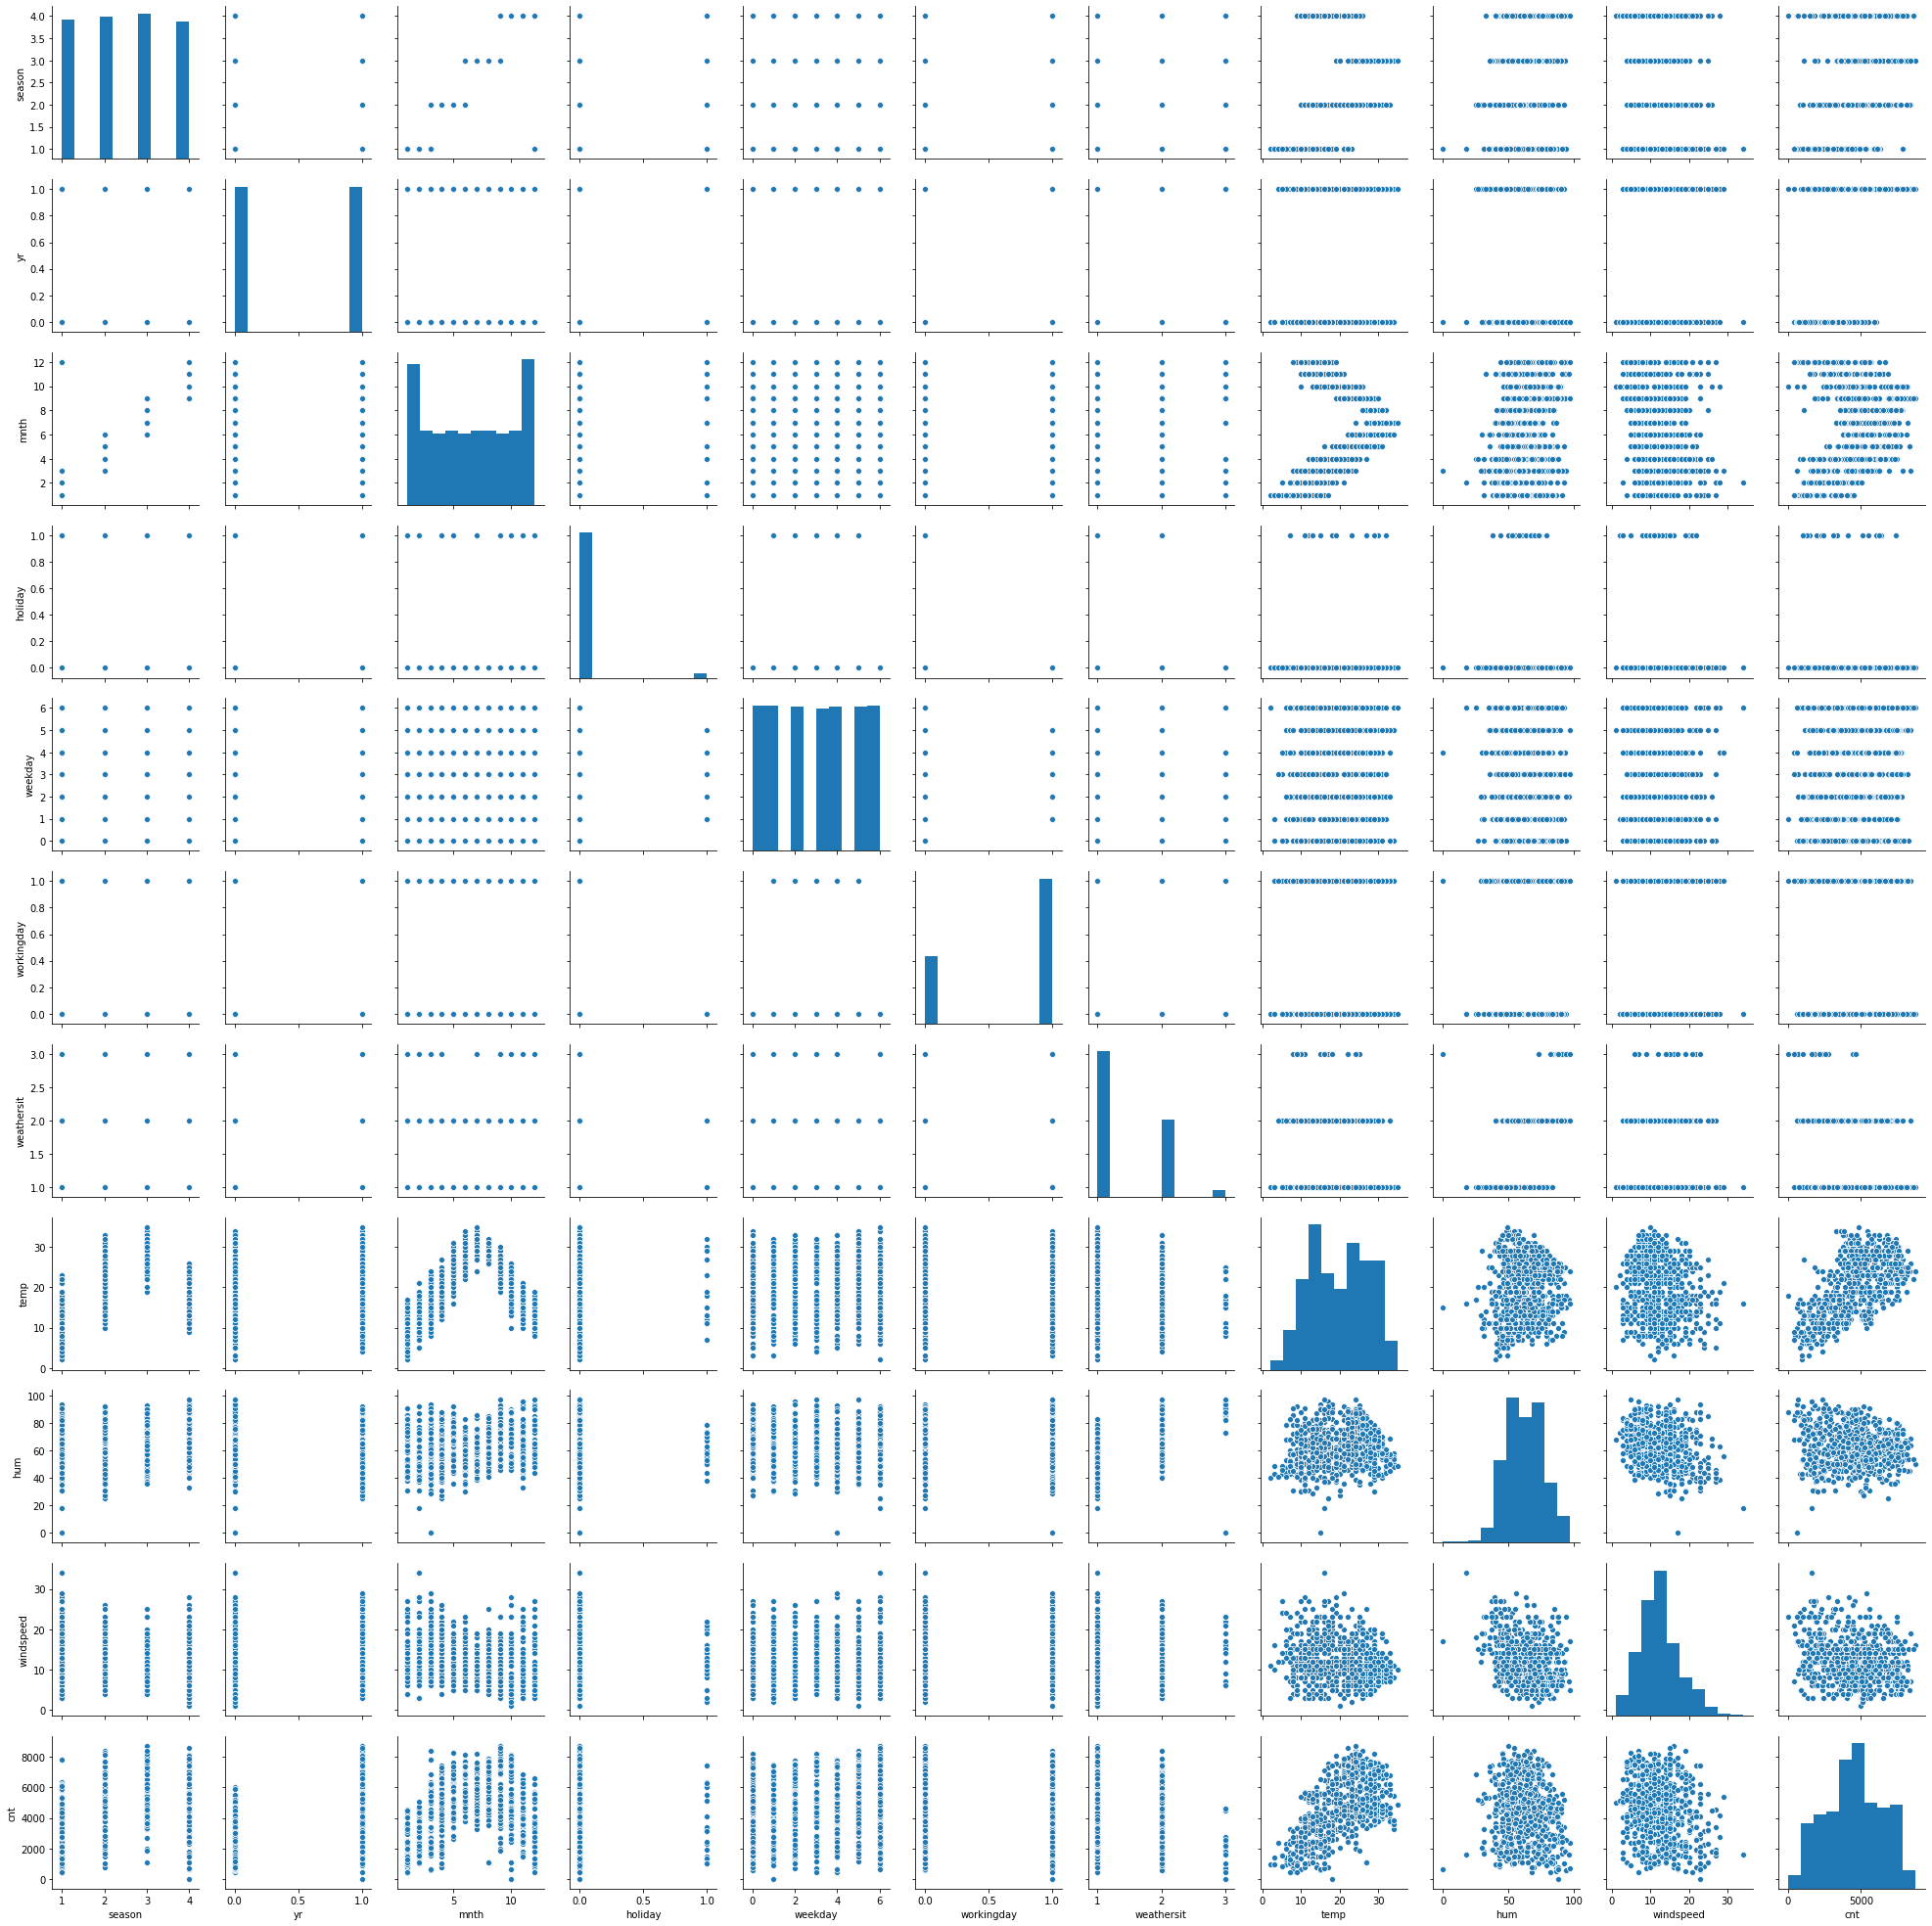

In [14]:
sns.pairplot(boombikes)
plt.show()

### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

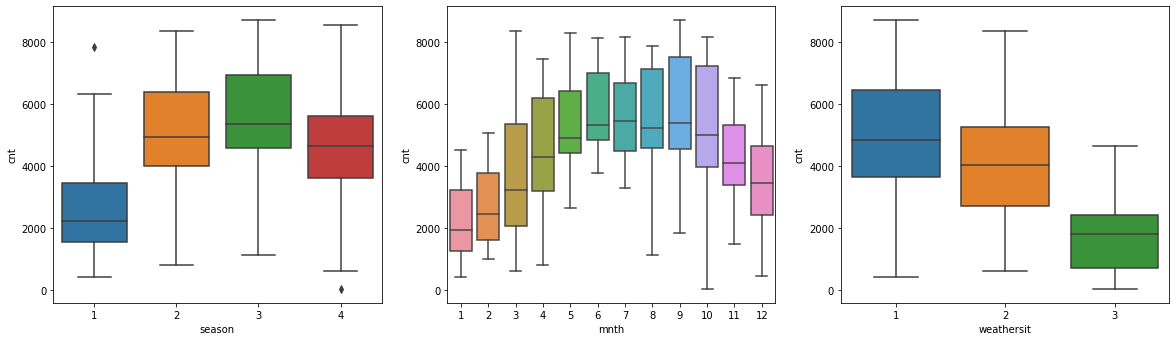

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boombikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = boombikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombikes)
plt.show()

### Check the correlation between the variables.

In [16]:
boombikes_corr = boombikes.corr()
boombikes_corr

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.334818,0.210081,-0.228318,0.404584
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.049118,-0.112018,-0.013196,0.569728
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.220475,0.226726,-0.204921,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.027311,-0.015599,0.010227,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.001765,-0.052484,0.016130,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.052615,0.022733,-0.021135,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.118780,0.590318,0.037450,-0.295929
temp,3.348178e-01,4.911805e-02,2.204748e-01,-0.027311,-0.001765,0.052615,-0.118780,1.000000,0.129839,-0.156321,0.626290
hum,2.100813e-01,-1.120177e-01,2.267259e-01,-0.015599,-0.052484,0.022733,0.590318,0.129839,1.000000,-0.252148,-0.098060
windspeed,-2.283185e-01,-1.319642e-02,-2.049205e-01,0.010227,0.016130,-0.021135,0.037450,-0.156321,-0.252148,1.000000,-0.233517


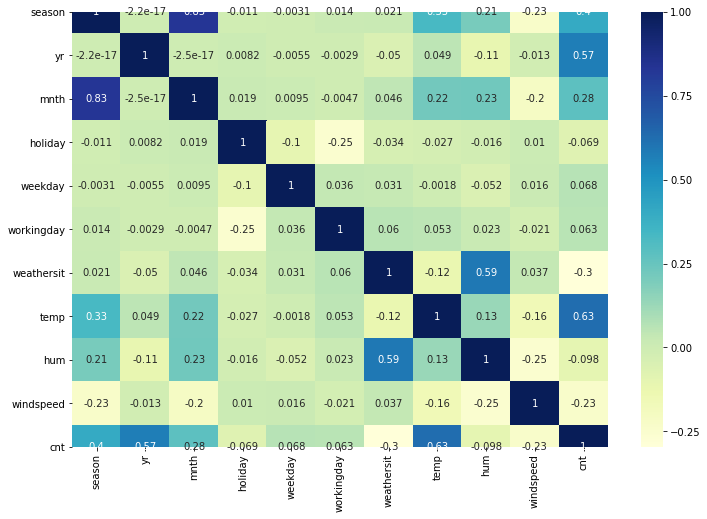

In [17]:
#ploting  the correlation between the variables.
plt.figure(figsize=(12,8))
sns.heatmap(boombikes_corr,annot=True,cmap="YlGnBu")
plt.show()

## Step 3: Data Preparation

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [18]:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14,80,10,985
1,1,0,1,0,0,0,2,14,69,16,801
2,1,0,1,0,1,1,1,8,43,16,1349
3,1,0,1,0,2,1,1,8,59,10,1562
4,1,0,1,0,3,1,1,9,43,12,1600


In [19]:
varlist_0 = ['season'] 
boombikes[varlist_0]= boombikes[varlist_0].apply(lambda x: x.map({1:'spring', 2:'summer', 
                                                                  3:'fall', 4:'winter'}))

In [20]:
varlist_1 = ['mnth']
boombikes[varlist_1] = boombikes[varlist_1].apply(lambda x: x.map({1: 'jan', 2:'feb', 3:'mar', 4:'apr', 
                                                                   5:'may', 6:'jun', 7:'july', 8:'aug',
                                                                   9:'sep', 10:'oct', 11:'nov', 12:'dec'}))

In [21]:
varlist_2 = ['weekday'] 
boombikes[varlist_2] = boombikes[varlist_2].apply(lambda x: x.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 
                                                                   4:'thu', 5:'fri', 6:'sat'}))

In [22]:
varlist_3 = ['weathersit']
boombikes[varlist_3] = boombikes[varlist_3].apply(lambda x: x.map({1: 'Clear', 2: 'Mist', 
                                                                   3: 'Light Snow', 4: 'Heavy Rain'}))
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14,80,10,985
1,spring,0,jan,0,sun,0,Mist,14,69,16,801
2,spring,0,jan,0,mon,1,Clear,8,43,16,1349
3,spring,0,jan,0,tue,1,Clear,8,59,10,1562
4,spring,0,jan,0,wed,1,Clear,9,43,12,1600


In [23]:
status_0 = pd.get_dummies(boombikes['season'], drop_first = True)

In [24]:
status_1 = pd.get_dummies(boombikes['mnth'], drop_first = True)

In [25]:
status_2 = pd.get_dummies(boombikes['weekday'], drop_first = True)

In [26]:
status_3 = pd.get_dummies(boombikes['weathersit'], drop_first = True)

In [27]:
# Add the results to the original housing dataframe

boombikes = pd.concat([boombikes, status_0, status_1, status_2, status_3], axis = 1)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
0,spring,0,jan,0,sat,0,Mist,14,80,10,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,Mist,14,69,16,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,Clear,8,43,16,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8,59,10,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,Clear,9,43,12,...,0,0,0,0,0,0,0,1,0,0


In [28]:
boombikes.drop(['season', 'mnth', 'weekday', 'weathersit' ], axis = 1, inplace = True)

In [29]:
boombikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
0,0,0,0,14,80,10,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14,69,16,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8,43,16,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8,59,10,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9,43,12,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
boombikes.shape

(730, 29)

## Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [31]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
boombikes_train, boombikes_test = train_test_split(boombikes, train_size = 0.7, 
                                                   test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

boombikes_train[num_vars] = scaler.fit_transform(boombikes_train[num_vars])

In [35]:
boombikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
653,1,0,1,0.515152,0.567010,0.31250,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.818182,0.721649,0.28125,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.424242,0.639175,0.25000,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.242424,0.494845,0.65625,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.393939,0.494845,0.18750,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [36]:
boombikes_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.533393,0.645704,0.322794,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225123,0.145907,0.165479,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333333,0.536082,0.218750,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545455,0.649485,0.312500,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727273,0.752577,0.406250,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


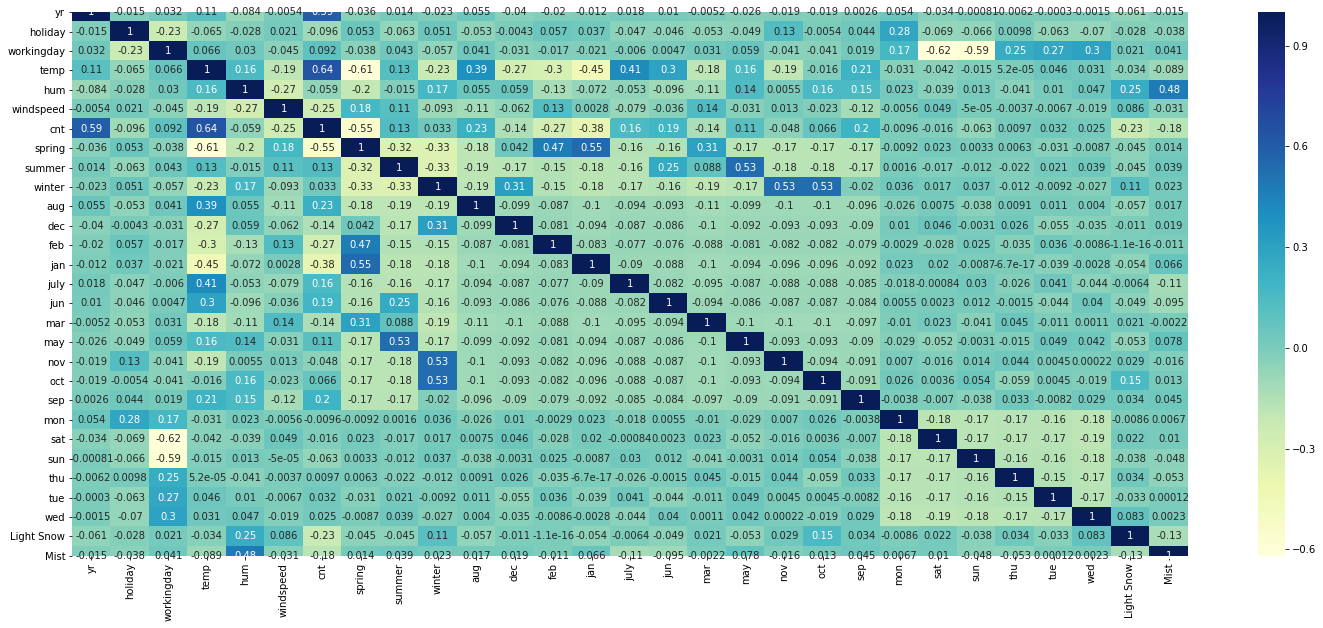

In [37]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 10))
sns.heatmap(boombikes_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `temp` seems to the correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`.

### Dividing into X and Y sets for the model building

In [38]:
y_train = boombikes_train.pop('cnt')
X_train = boombikes_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [39]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 4),
 ('dec', False, 11),
 ('feb', False, 5),
 ('jan', False, 13),
 ('july', True, 1),
 ('jun', False, 8),
 ('mar', False, 2),
 ('may', False, 3),
 ('nov', False, 10),
 ('oct', True, 1),
 ('sep', True, 1),
 ('mon', False, 7),
 ('sat', True, 1),
 ('sun', False, 6),
 ('thu', False, 12),
 ('tue', False, 14),
 ('wed', False, 9),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [42]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'july', 'oct', 'sep', 'sat', 'Light Snow', 'Mist'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may', 'nov', 'mon', 'sun',
       'thu', 'tue', 'wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [44]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [45]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [46]:
lm_1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [47]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          4.58e-191
Time:                        19:49:33   Log-Likelihood:                 519.17
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     494   BIC:                            -938.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2581      0.036      7.134      0.0

In [48]:
X_train_new = X_train_rfe.drop(["holiday"], axis=1)

In [49]:
X_train_new.shape

(510, 15)

In [50]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'july', 'oct', 'sep', 'sat', 'Light Snow', 'Mist'],
      dtype='object')

In [51]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [52]:
lm_2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [53]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.4
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          2.88e-191
Time:                        19:49:34   Log-Likelihood:                 516.90
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -940.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2497      0.036      6.920      0.0

In [54]:
X_train_new = X_train_new.drop(["oct"], axis = 1)

In [55]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'july', 'sep', 'sat', 'Light Snow', 'Mist'],
      dtype='object')

In [56]:
X_train_new.shape

(510, 14)

In [57]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [58]:
lm_3 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [59]:
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          2.83e-191
Time:                        19:49:35   Log-Likelihood:                 514.13
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -941.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2359      0.036      6.599      0.0

In [60]:
X_train_new = X_train_new.drop(["spring"], axis = 1)

In [61]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'july', 'sep', 'sat', 'Light Snow', 'Mist'],
      dtype='object')

In [62]:
X_train_new.shape

(510, 13)

In [63]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [64]:
lm_4 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [65]:
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.6
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.14e-190
Time:                        19:49:36   Log-Likelihood:                 509.88
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     497   BIC:                            -938.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1733      0.029      6.055      0.0

In [66]:
X_train_new = X_train_new.drop(["july"], axis = 1)

In [67]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'sep', 'sat', 'Light Snow', 'Mist'],
      dtype='object')

In [68]:
X_train_new.shape

(510, 12)

In [69]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [70]:
lm_5 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [71]:
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     239.0
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.17e-190
Time:                        19:49:36   Log-Likelihood:                 507.01
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     498   BIC:                            -939.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1729      0.029      6.012      0.0

In [72]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.99
2,temp,8.07
1,workingday,4.52
4,windspeed,3.86
10,Mist,2.10
0,yr,2.02
8,sat,1.78
6,winter,1.66
5,summer,1.58
7,sep,1.20


In [74]:
X_train_new = X_train_new.drop(['hum'], axis=1)

In [75]:
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'summer', 'winter', 'sep',
       'sat', 'Light Snow', 'Mist'],
      dtype='object')

In [76]:
X_train_new.shape

(510, 10)

In [77]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [78]:
lm_6 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [79]:
#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     252.2
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          6.28e-188
Time:                        19:49:37   Log-Likelihood:                 497.68
No. Observations:                 510   AIC:                            -973.4
Df Residuals:                     499   BIC:                            -926.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0780      0.019      4.149      0.0

In [80]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.54
0,yr,2.02
7,sat,1.69
4,summer,1.57
9,Mist,1.53
5,winter,1.40
6,sep,1.20
8,Light Snow,1.08


In [81]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [82]:
lm_7 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [83]:
#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     252.2
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          6.28e-188
Time:                        19:49:38   Log-Likelihood:                 497.68
No. Observations:                 510   AIC:                            -973.4
Df Residuals:                     499   BIC:                            -926.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0780      0.019      4.149      0.0

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [84]:
y_train_pred = lm_6.predict(X_train_lm)

In [85]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

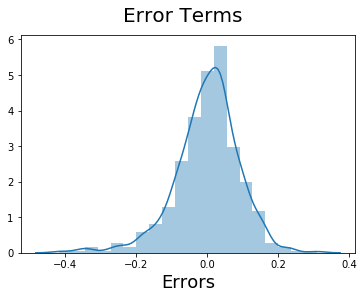

In [86]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [88]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

boombikes_test[num_vars] = scaler.transform(boombikes_test[num_vars])
boombikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
184,0,1,0,-0.035813,0.006696,-0.059570,-0.002451,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,-0.033058,0.006271,-0.057617,-0.002449,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,-0.044995,0.008609,-0.051758,-0.002496,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,-0.033976,0.004464,-0.051758,-0.002468,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,-0.035813,0.003188,-0.045898,-0.002466,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [89]:
boombikes_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,-0.043817,0.006536,-0.052636,-0.002471,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.007069,0.001535,0.004852,0.000025,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,-0.059688,0.002657,-0.063477,-0.002526,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.049587,0.005367,-0.055664,-0.002488,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,-0.044077,0.006377,-0.052734,-0.002471,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,-0.037649,0.007652,-0.049805,-0.002454,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,-0.031221,0.010309,-0.038086,-0.002420,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [91]:
y_test = boombikes_test.pop('cnt')
X_test = boombikes_test

In [92]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'july', 'jun', 'mar',
       'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light Snow', 'Mist'],
      dtype='object')

In [94]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
X_test_lm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
184,1.0,0,1,0,-0.035813,0.006696,-0.059570,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,1,0,1,-0.033058,0.006271,-0.057617,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,-0.044995,0.008609,-0.051758,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,1.0,0,0,1,-0.033976,0.004464,-0.051758,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,-0.035813,0.003188,-0.045898,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [95]:
X_test_lm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'july', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed', 'Light Snow', 'Mist'],
      dtype='object')

In [ ]:
X_test_lm = X_test_lm.drop['holiday','hum', 'spring', 'july', 'oct',  ]

In [128]:
# Making predictions
y_pred = lm_7.predict(X_test_m7)

## Model Evaluation

Text(0, 0.5, 'y_pred')

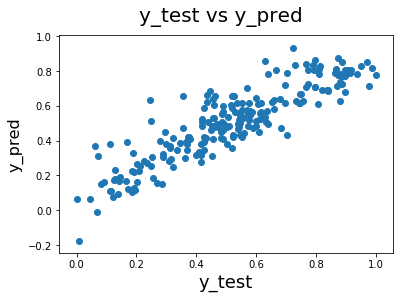

In [129]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label


We can see that the equation of our best fitted line is:

$ price = 0.236  \times  area + 0.202  \times  bathrooms + 0.11 \times stories + 0.05 \times mainroad + 0.04 \times guestroom + 0.0876 \times hotwaterheating + 0.0682 \times airconditioning + 0.0629 \times parking + 0.0637 \times prefarea - 0.0337 \times unfurnished $


In [130]:
# Adding a constant variable 
import statsmodels.api as sm  
X_test_lm = sm.add_constant(X_test_new)

In [131]:
lm_t = sm.OLS(y_test,X_test_lm).fit()   # Running the linear model

In [132]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     84.89
Date:                Sun, 26 Jul 2020   Prob (F-statistic):           8.54e-68
Time:                        19:41:50   Log-Likelihood:                 181.48
No. Observations:                 219   AIC:                            -341.0
Df Residuals:                     208   BIC:                            -303.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0191      0.034      0.567      0.5

In [133]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
r_squared

0.7871044590526252